<h1 align="center"> Project Milestone 2: Data Analysis 1 </h1>
<h3 align="center"> Group 7 IST 5520  </h3>
<h3 align="center"> Members:  Joshua Jaeger, Maxwell Butler, Austin Funcheon, Conor Joyce, Casey Kemerer, David Poteet</h3>
<h3 align="center"> Oct 29th 2021 </h3>

 <h1 align="center">  Introduction: </h1>
 
Group 7 intends to use the Lahman Database of MLB statistics to create a fair market calculator for different MLB player's salaries. The database will act as our training set and will be partitioned to include a test set to test the effectiveness of our calculator.

General Managers, or GMs, in the MLB often struggle with determining the true value of a player. These GMs are expected to bring a championship to their team, which involves balancing talent with a budget. There are a significant number of statistics that are utilized to demonstrate the performance of both position players and pitchers, but what statistics truly determine the value of the player. How is a GM able to evaluate a player's performance and provide a salary relatable to their value? The business problems we intend to answer to understand the value of players can be summarized with the following questions:
<ul>
    <li> Given a pitcher's performance what should their salary be? </li>
    <li> Given a batter's performance what should their salary be? </li>
    <li> Given a position player's defensive performance what should their salary be? </li>
</ul>

Depending on project constraints, and what provide the best results, those questions may be modified to better understand the problem at hand.

Our intended input will be relevant season statistics for each group. For example, statistics relevant to a pitcher are ERA, Strike Outs, Win-Loss record, and other stats. However, hitting statistics are not relevant for a pitcher.

Our intended output will either be a specific value for a salary or a salary range which a team could negotiate in.


 <h1 align="center"> Database and collection: </h1>
The database we will be using to accomplish our task is the Lahman database, considered the most comprehensive open-source database for baseball statistics. This database meets project requirements: 
<ul>
    <li> the pitching table alone has 23 variables and over 48,000 observations, </li>
    <li> the dataset is raw and uncleansed, we will need to do a lot of cleaning and extraction to get the data we need, </li>
    <li> the data will tell an interesting story by answering our business problem, and </li>
    <li> although the dataset is used by a large number of people (specifically Sabermatricians who use statistics to find truth in baseball) this specific problem has not been addressed and our solution will be unique and independent of any work done with this database.
</ul>

The database is in a relational format with each table in a unique .csv file and has been uploaded to github.
For an explanation of the Baseball terms, and some of the combination variables that were created out of the raw data, see "StatsDictionary.csv" for additional definition and detail.

 <h1 align="center">  Data Consolidation and Cleaning:</h1>
 

First step is to clean, reduce dimensionally, and standardize the data.
In this case, there are two data sets: Pitching, and Hitting.

In file "Data Joining.ipynb", many of the raw files are processed and combined into the pitching and hitting data files, including the following steps:
<br>Importing the data from: 
        <li> People.csv</li>
        <li> Teams.csv </li>
        <li> Pitching.csv </li>
        <li> Batting.csv </li>
        <li> Salaries.csv </li>
Eliminating columns that have no relevance to salary analysis
<br>Export of "joinedPitchingDF.csv" and "joinedHittingDF.csv"


In file "Data Cleansing2.ipynb", several adjustments were made to clean up the data, including the following steps:
<li> Importing the data from "joinedPitchingDF.csv" and "joinedHittingDF.csv" </li>
<li> Cleansing the data of null datasets </li>
<li> Visualize Salary data as a plot by year </li>
<b>insert chart here</b>
<li> Visualize Salary data as an avg plot by year </li>
<b>insert chart here</b>
<li> Creation of the "RealSalary" Field: Adjusting the salary data for inflation, using CPI to normalize the data to 2016 dollars</li>
<li> From the Hitting data set, Pitchers from before 2003 were removed, as irrelevant datapoints. </li>
<li> Creation of "LogSalary" Field, to account for data skew</li>
<b>insert chart here</b>
<li> Removal of data outliers > Q3 + 1.5*IQR on LogSalary </li>
<b>insert chart here</b>
<li> Finalizing and exporting cleansed data as "cleansedPitchingDF.csv" and "cleansedHittingDF.csv" respectively. </li>


 <h1 align="center">  Dimension Reduction Through Variable Combination:</h1>
   
In file "Dimension Reduction - Variable combination.ipynb", cleansed data is imported and variables are aggregated.
  <li>Compliation of XBH, or Extra Base Hits. </li>
  <li>Compliation of SLG, or Slugging  </li>
  <li>Compliation of BA, or Batting Average  </li>
  <li>Compliation of OBP, or On Base Percentage  </li>
  <li>Compliation of OPS, or On Base Plus Slugging  </li>
  <li>Dropping of irrelevant / combined varibles feeding the above common baseball summary statistics </li>
Export of "combinationPitchingDF.csv" and "combinationHittingDF.csv"

 <h1 align="center">  Correlation Analysis:</h1>

This step is to run several steps of correlation analysis, and reduce the dimensionality of the dataset.

In file "Correlation .ipynb", an initial review of the correlation of variables was conducted. 
<li> Importing the data </li>
<li> Visualizing a heat map of the remaining variables</li>


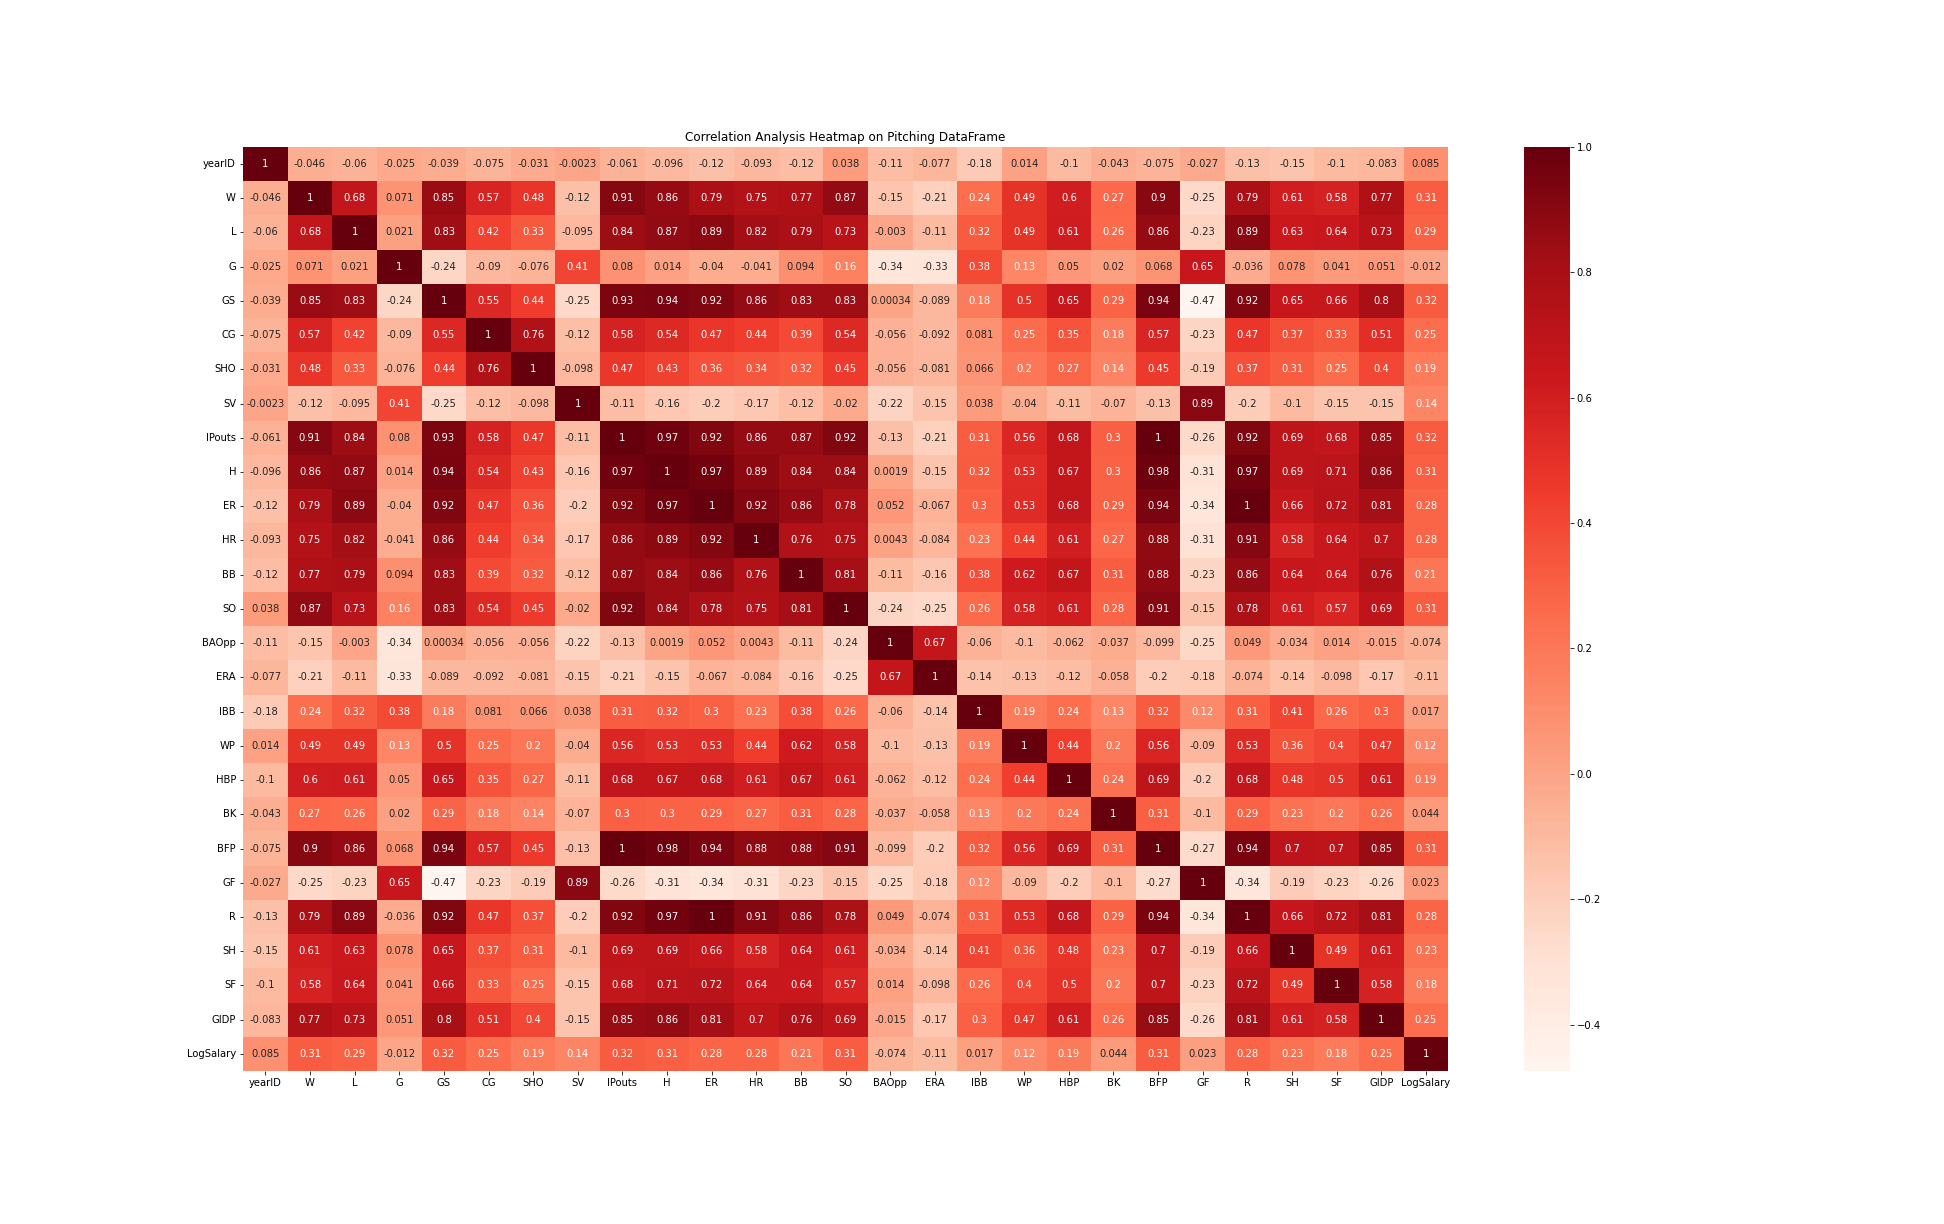

In [52]:
from IPython import display
display.Image("./PitchingHeatmap.png",  width=500)

IPOuts – Innings Pitched * Outs and BFP – Batter’s Facing Pitcher. 

    These both have major multicollinearity issues and are measuring the same thing.
    Dropping BFP

R – Runs, ER- Earned Runs. 

    This has high multicollinearity, little difference between the R, ER, and ERA.
    Keeping ERA
    Dropping R, ER

BB – Intentional Base on Balls. 

    More of a coaching decision than player performance. Low correlation to LogSalary.
    Dropping BB

BK – Balks.
    
    Low correlation with LogSalary and some multicollinearity issues.
    Dropping BK

GF – Games Finished. 

    Low correlation with LogSalary and some multicollinearity issues
    Dropping GF

G- Games, 

    Low correlation with LogSalary and multicollinearity issues.
    Dropping G

L- Losses, 

    L has a lot of correlation with W – Wins, 
    Combining into W/L Ratio.
     Dropping both W and L.

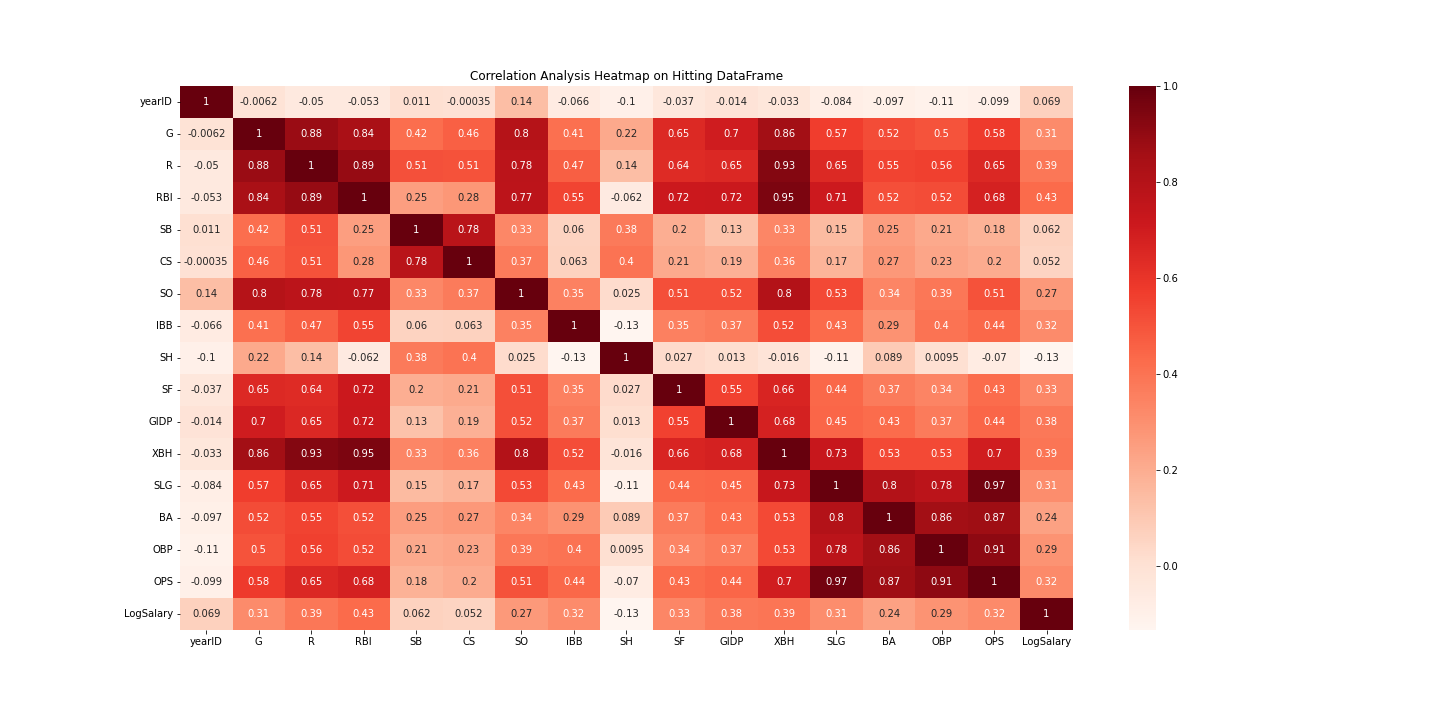

In [40]:
display.Image("./HittingHeatmap.png",  width=800)

Heatmap for Pitching is located above.
This visualization helps highlight variables that correlate well with LogSalary, or correlate with other indepentent variables.
    
All of the below variables are measuring similar effects and have a large amount of collinearity with eachother. Using variable OPS – On-Base Plus Slugging is a good substitue for all of the variables, and takes all of these into account, so there is very little loss of fidelity.  

+OPS. Removals: 

    ·XBH – Extra Base hits, 
    ·SLG – Slugging, 
    ·BA – Batting Average, 
    ·OBP – On-Base Percentage 
    
Additonally, 

    ·CS – Caught Stealing, removing due to high colinearity with SB – Stolen Bases. 
    
        Someone who steals more bases is likely to get caught more as well, so this make sense.
        Dropping CS.

    ·G – Games played Has multicollinearity with several variables being kept. 
    
        It is also not a reflection of a player’s ability to play.
        Dropping G

 <h1 align="center">  Correlation Analysis with Variable Removal</h1>

In file "Correlation Analysis after Variable Removal.ipynb", an initial review of the correlation of variables was conducted. 
<li> Importing the data </li>
<li> Visualizing a heat map of the remaining variables</li>

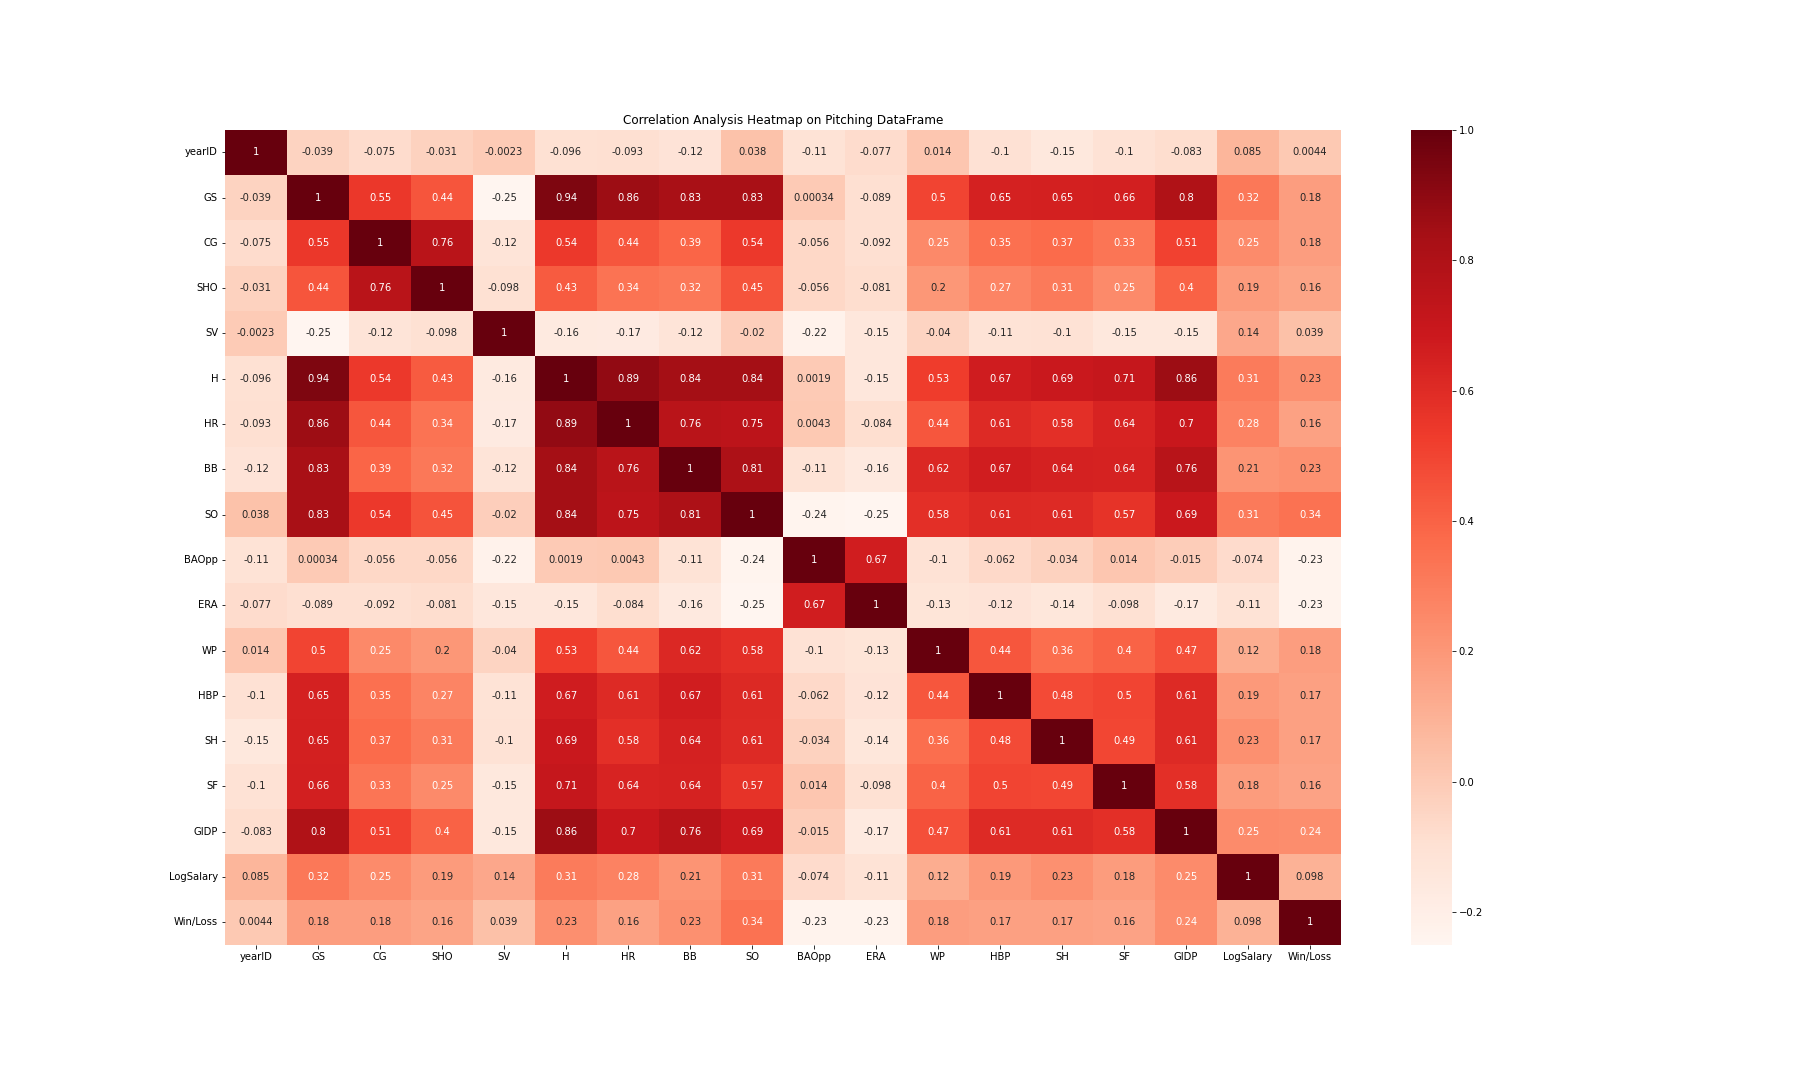

In [39]:
display.Image("./PitchingHeatmap2.png",  width=800) 

Heatmap for Pitching after Variable Removal

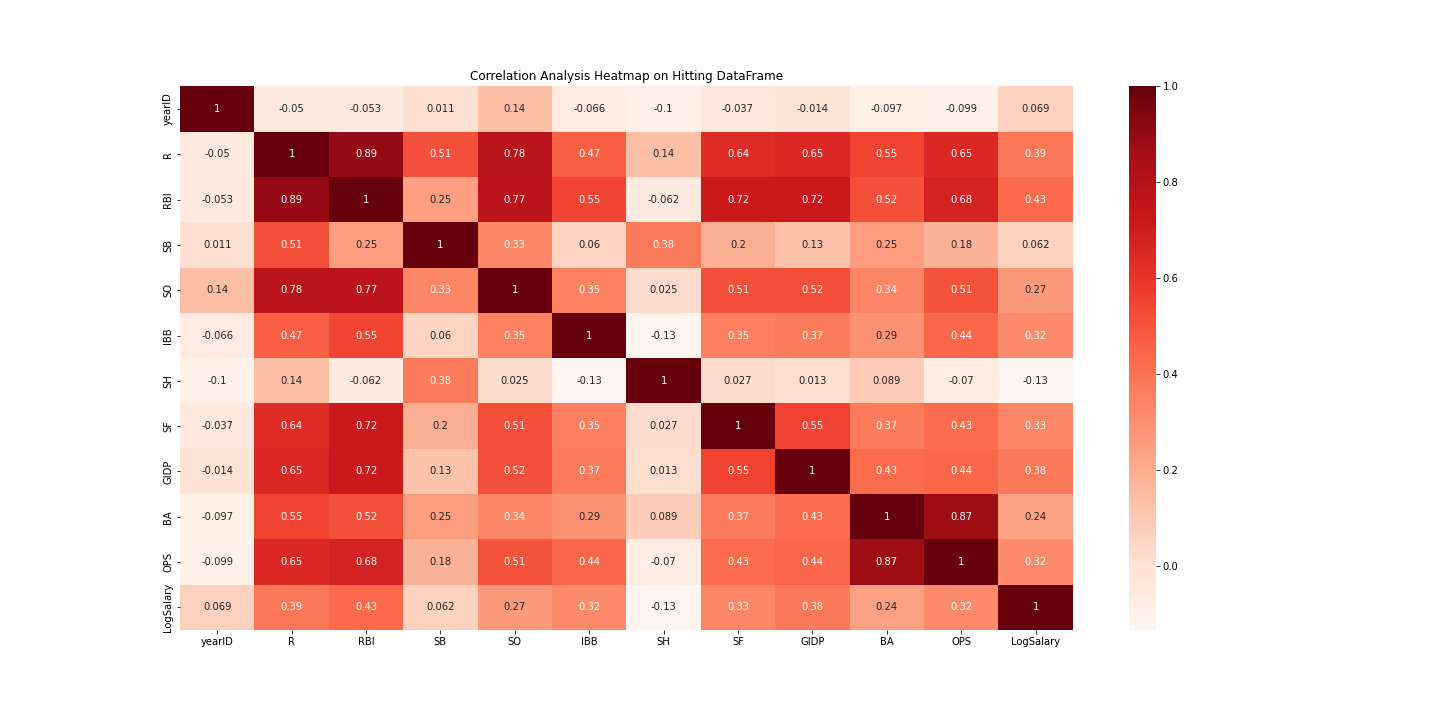

In [38]:
display.Image("./HittingHeatmap2.png",  width=800)

Heatmap for Hitting after Variable Removal

 <h1 align="center"> Initial Principal Component Analysis </h1>

This step is to run and initial PCA, and then repeat the process once reduction is achieved.

In file "PCA.ipynb", an initial review of the principal component analysis.
        Steps included:
        <li>Importing the data from "no_NA_PitchingDF.csv" and "no_NA_HittingDF.csv" </li>
        <li> Normalizing the data</li>
        <li> Setting the PCA up for each dataset </li>
        <li> Running Scree Plots and identifying 90% Integrity levels</li>
        <li> Outputing the initial PCA matrix </li>
       


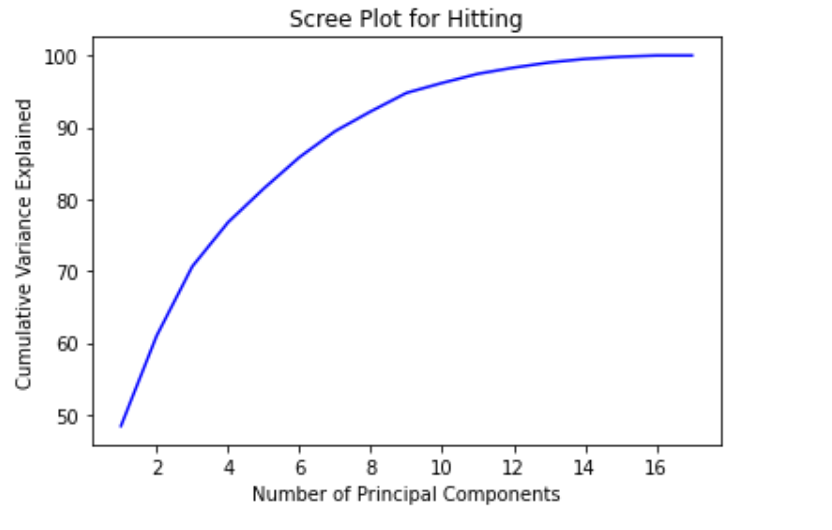

In [35]:
display.Image("./PCA/PCAScreePlotHitting.png",  width=500) 

words and stuff. 90% level for hitting 8 PC

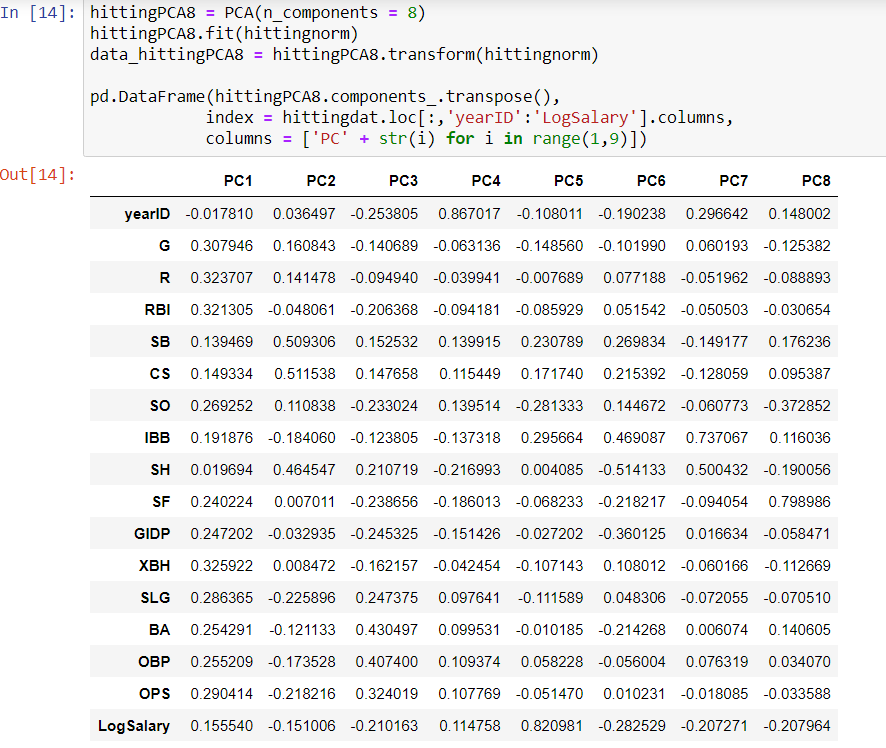

In [27]:
display.Image("./PCA/PCAHittingPCs.png",  width=600) 

In [ ]:
word and stuff

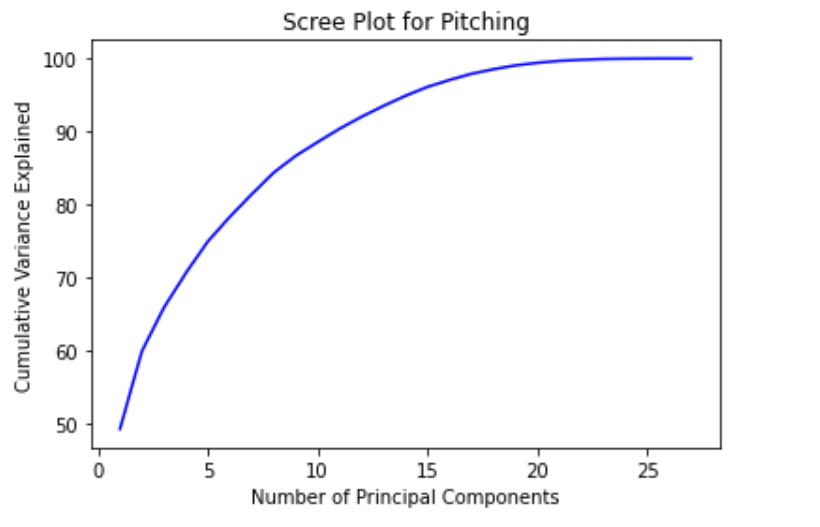

In [29]:
display.Image("./PCA/PCAScreePlotPitching.png", width=500) 

words and stuff. 90% level for hitting 11 PCs

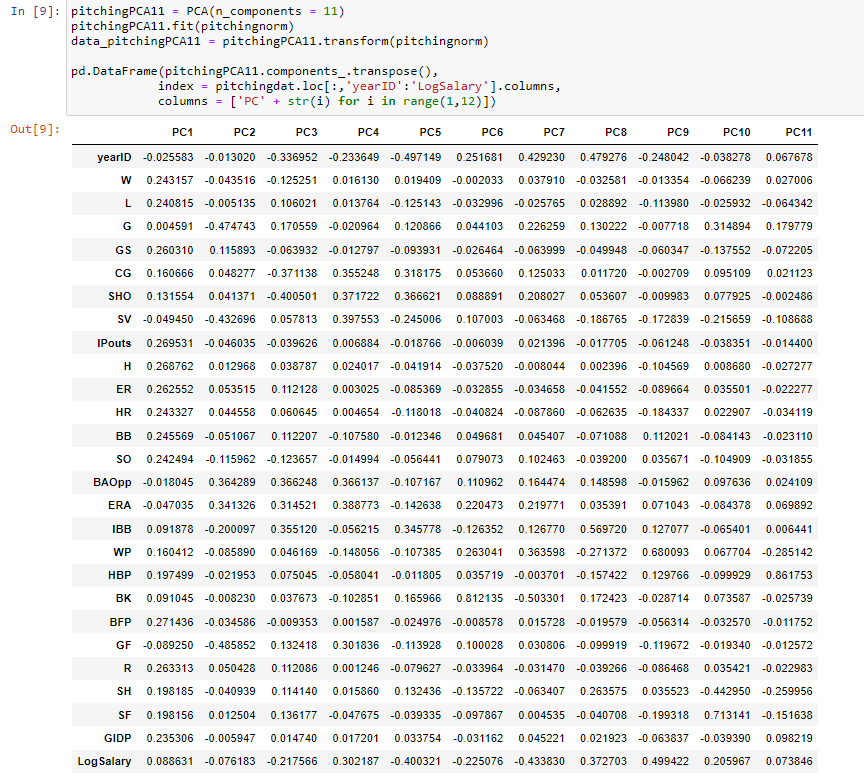

In [30]:
display.Image("./PCA/PCAPitchingPCs.png",  width=600) 

In [ ]:
words and stuff

 <h1 align="center"> Principal Component Analysis with Variable Removal </h1>

This step is to run with a repeated PCA, once variables have been removed from above correlation studies

In file "PCA after Variable Removal.ipynb", an initial review of the principal component analysis.
        Steps included:
        <li>Importing the data from "Multicollinearity_Removal_Pitching.csv" and "Multicollinearity_Removal_Hitting.csv" </li>
        <li> Normalizing the data</li>
        <li> Setting the PCA up for each dataset </li>
        <li> Running Scree Plots and identifying 90% Integrity levels</li>
        <li> Outputing the new PCA matrix </li>

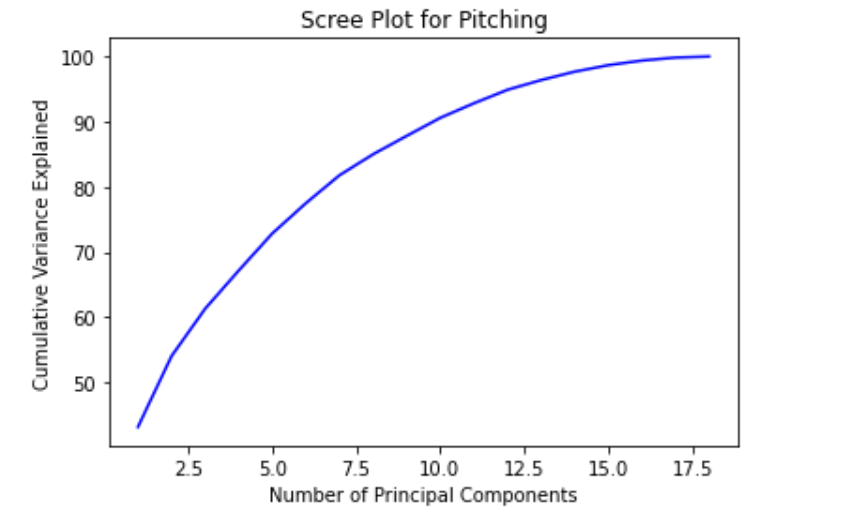

In [31]:
display.Image("./PCA/PCA2ScreePlotPitchingwRemoval.png",  width=500) 

In [ ]:
describe 90% with PC now at 10

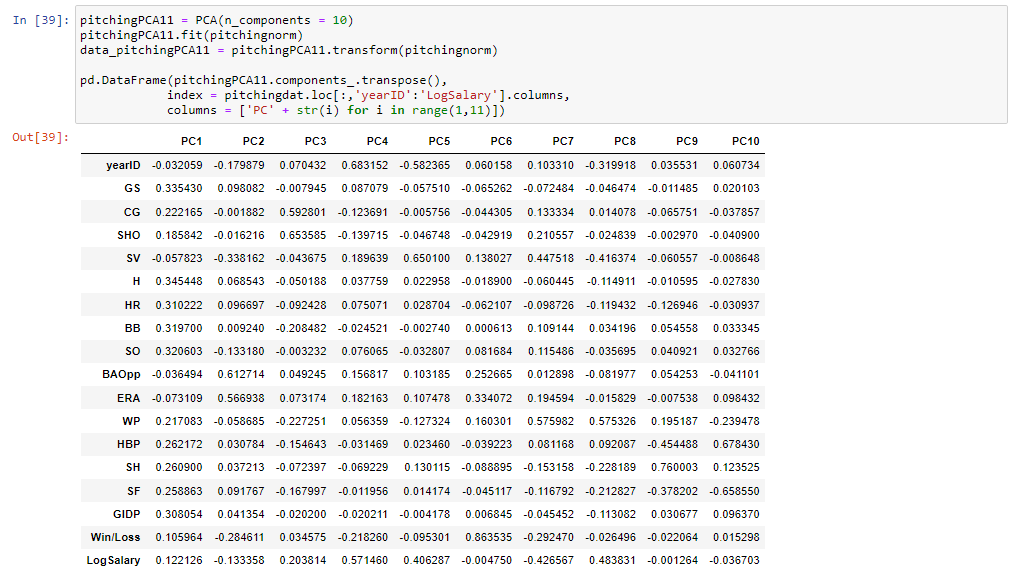

In [32]:
display.Image("./PCA/PCA2PitchingPCs.png",  width=600) 

In [ ]:
words and stuff

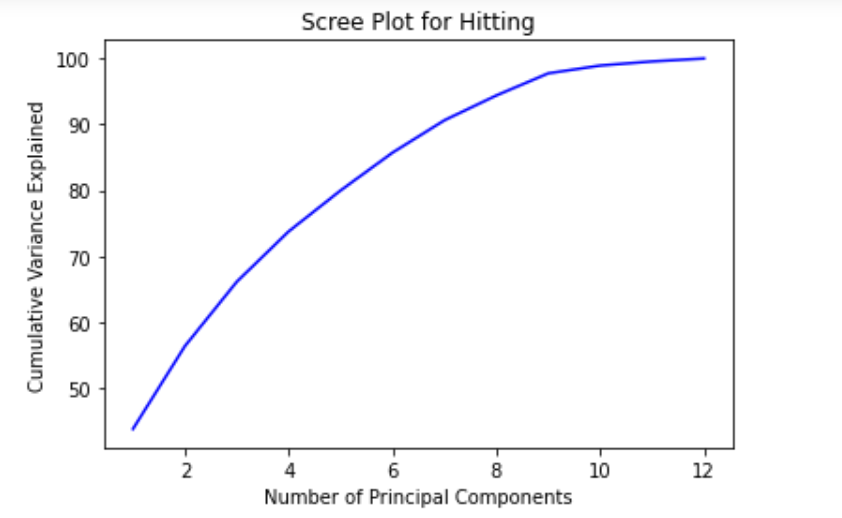

In [33]:
display.Image("./PCA/PCA2ScreePlotHittingwRemoval.png",  width=500) 

In [ ]:
90% now with 7 pcs

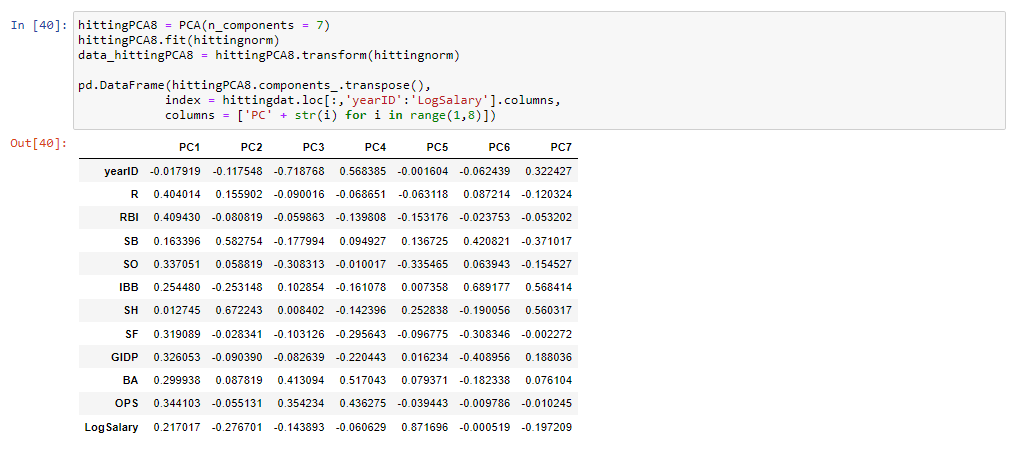

In [34]:
display.Image("./PCA/PCA2HittingPCs.png" ,  width=600) 

In [ ]:
word and stuff

 <h1 align="center"> Summary </h1>

In [ ]:
words and stuff